<a href="https://colab.research.google.com/github/subhashsomarouthu/covid19_analyses_and_prediction/blob/main/covid_19_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# storing and anaysis
import pandas as pd
import numpy as np

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# interactive plots
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Import Machine Learning algorithms
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA

import datetime

In [4]:
# More data from CSSEGISandData
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
confirmed_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
deaths_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21
0,NaN,Afghanistan,34,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2973,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561
1,NaN,Albania,41,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2451,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3480,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824
3,NaN,Andorra,43,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,772,780,784,788,794,797,800,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929


In [ ]:
recovered_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21
0,NaN,Afghanistan,34,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226
1,NaN,Albania,41,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047
2,NaN,Algeria,28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911
3,NaN,Andorra,43,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770
4,NaN,Angola,-11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298


In [6]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)
print("No.of Confirmed Cases", world_confirmed)
print("No. of Recovered Cases",world_recovered)
print("No. of Deaths",world_deaths)
print("No. of Active Cases",world_active)



No.of Confirmed Cases 3/9/23    676570149
dtype: int64
No. of Recovered Cases 3/9/23    0
dtype: int64
No. of Deaths 3/9/23    6881802
dtype: int64
No. of Active Cases 3/9/23    683451951
dtype: int64


ValueError: ignored

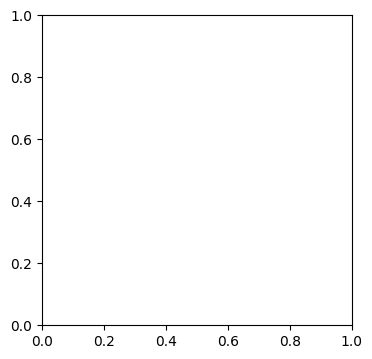

In [7]:
labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.01)
    
plt.figure(figsize= (4,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
#centre_circle = plt.Circle((0,0),0.70,fc='white')

#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 10)
plt.axis('equal')  
plt.tight_layout()

In [8]:
covid_india=pd.read_csv("/content/drive/MyDrive/Datasets/complete.csv")
covid_india.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3505,6/30/2020,Telangana,18.1124,79.0193,15394,253,5582,975,6,410
3506,6/30/2020,Tripura,23.9408,91.9882,1380,1,1085,34,0,6
3507,6/30/2020,Uttar Pradesh,26.8467,80.9462,22828,672,15506,681,12,698
3508,6/30/2020,Uttarakhand,30.0668,79.0193,2831,39,2111,8,1,93
3509,6/30/2020,West Bengal,22.9868,87.8550,17907,653,11719,624,14,526


In [9]:
india_data=covid_india.drop(["Latitude","Longitude","New cases","New deaths","New recovered"],axis=1)
india_data["Date"]=pd.to_datetime(india_data["Date"])
india_data.tail()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated
3505,2020-06-30,Telangana,15394,253,5582
3506,2020-06-30,Tripura,1380,1,1085
3507,2020-06-30,Uttar Pradesh,22828,672,15506
3508,2020-06-30,Uttarakhand,2831,39,2111
3509,2020-06-30,West Bengal,17907,653,11719


In [10]:
co=india_data[['Name of State / UT','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
states_data=co.groupby(['Name of State / UT']).agg({"Total Confirmed cases":"max","Death":"max","Cured/Discharged/Migrated":"max"})
states_data=states_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
states_data.drop('Telengana',inplace=True)
states_data.tail(10)

,Total Confirmed cases,Death,Cured/Discharged/Migrated
Name of State / UT,,,
Haryana,14210,232,9502
Karnataka,14295,226,7683
Telangana,15394,253,5582
Rajasthan,17660,405,13618
West Bengal,17907,653,11719
Uttar Pradesh,22828,672,15506
Gujarat,31938,1827,23240
Delhi,85161,2680,56235
Tamil Nadu,86224,1141,47749


In [11]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 101.9 MB/s eta 0:00:00


In [12]:
co=india_data[['Date','Total Confirmed cases',"Death","Cured/Discharged/Migrated"]]
india_data=co.groupby(['Date']).agg({"Total Confirmed cases":"sum","Death":"sum","Cured/Discharged/Migrated":"sum"})
india_data=india_data.sort_values(["Total Confirmed cases","Death","Cured/Discharged/Migrated"],ascending=[1,1,1])
india_data["Days Since"]=india_data.index-india_data.index[0]
india_data["Days Since"]=india_data["Days Since"].dt.days

group_names=["Low","Medium","High"]

bins=np.linspace(min(india_data['Total Confirmed cases']),max(india_data['Total Confirmed cases']),4)
india_data["Confirmed Rate"]=pd.cut(india_data["Total Confirmed cases"],bins,labels=group_names,include_lowest=True)

bins=np.linspace(min(india_data["Death"]),max(india_data["Death"]),4)
india_data["Death Rate"]=pd.cut(india_data["Death"],bins,labels=group_names,include_lowest=True)

bins=np.linspace(min(india_data["Cured/Discharged/Migrated"]),max(india_data["Cured/Discharged/Migrated"]),4)
india_data["Recovered Rate"]=pd.cut(india_data["Cured/Discharged/Migrated"],bins,labels=group_names,include_lowest=True)

columns_name=['Days Since','Total Confirmed cases','Confirmed Rate','Death','Death Rate','Cured/Discharged/Migrated','Recovered Rate']
india_data_reindex=india_data.reindex(columns=columns_name)
india_data=india_data_reindex
india_data.tail(10)
india_data

,Days Since,Total Confirmed cases,Confirmed Rate,Death,Death Rate,Cured/Discharged/Migrated,Recovered Rate
Date,,,,,,,
2020-01-30,0,1,Low,0,Low,0,Low
2020-01-31,1,1,Low,0,Low,0,Low
2020-02-01,2,2,Low,0,Low,0,Low
2020-02-02,3,3,Low,0,Low,0,Low
2020-02-03,4,3,Low,0,Low,0,Low
...,...,...,...,...,...,...,...
2020-06-25,147,464612,High,14894,High,271697,High
2020-06-27,149,500930,High,15685,High,295881,High
2020-06-28,150,521020,High,16095,High,309713,High


In [13]:
columns_name=['Days Since','Total Confirmed cases','Death','Cured/Discharged/Migrated']
india_data_reindex=india_data.reindex(columns=columns_name)
india_data = india_data_reindex
#india_data["Date"] = india_data.index
india_data.reset_index(inplace=True)
india_data

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-01-30,0,1,0,0
1,2020-01-31,1,1,0,0
2,2020-02-01,2,2,0,0
3,2020-02-02,3,3,0,0
4,2020-02-03,4,3,0,0
...,...,...,...,...,...
147,2020-06-25,147,464612,14894,271697
148,2020-06-27,149,500930,15685,295881
149,2020-06-28,150,521020,16095,309713
150,2020-06-29,151,541033,16475,321723


In [14]:
india_data=pd.read_csv("/content/drive/MyDrive/Datasets/india_updated.csv")
india_data["Date"]=pd.to_datetime(india_data["Date"])
india_data

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-01-30,0,1,0,0
1,2020-01-31,1,1,0,0
2,2020-02-01,2,2,0,0
3,2020-02-02,3,3,0,0
4,2020-02-03,4,3,0,0
...,...,...,...,...,...
148,2020-06-26,148,482128,15286,283076
149,2020-06-27,149,500930,15685,295881
150,2020-06-28,150,521020,16095,309713
151,2020-06-29,151,541033,16475,321723


In [15]:
#### Pre Lockdown from 1st March 2020 – 24 March 2020

#### Lockdown 1 from 25 March 2020 – 14 April 2020 (21 days)

#### Lockdown 2 from 15 April 2020 – 3 May 2020 (19 days)

#### Lockdown 3 from 4 May 2020 – 17 May 2020 (14 days)

#### Lockdown 4 from 18 May 2020 – 31 May 2020 (14 days)

#### UnLockdown 1 (only for containment zones): 1 June 2020 – ongoing (30 days); scheduled to end on 30 June 2020
df0 = india_data[(india_data["Date"]>="2020-03-01") & (india_data["Date"]<="2020-03-24")]
df1 = india_data[(india_data["Date"]>="2020-03-25") & (india_data["Date"]<="2020-04-14")]
df2 = india_data[(india_data["Date"]>="2020-04-15") & (india_data["Date"]<="2020-05-03")]
df3 = india_data[(india_data["Date"]>="2020-05-04") & (india_data["Date"]<="2020-05-17")]
df4 = india_data[(india_data["Date"]>="2020-05-18") & (india_data["Date"]<="2020-05-31")]
df5 = india_data[(india_data["Date"]>="2020-06-01")]

In [16]:
# melt data
temp = df0[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp.columns = ["Date","Active","Deaths","Cured"]
temp = temp.melt(id_vars="Date", value_vars=["Deaths","Cured", "Active"],var_name='Case', value_name='Count')
temp

,Date,Case,Count
0,2020-03-01,Deaths,0
1,2020-03-02,Deaths,0
2,2020-03-03,Deaths,0
3,2020-03-04,Deaths,0
4,2020-03-05,Deaths,0
...,...,...,...
67,2020-03-20,Active,195
68,2020-03-21,Active,283
69,2020-03-22,Active,360
70,2020-03-23,Active,433


(array([18321., 18322., 18326., 18330., 18334., 18338., 18342., 18346.]),
 [Text(18321.0, 0, '2020-02-29'),
  Text(18322.0, 0, '2020-03-01'),
  Text(18326.0, 0, '2020-03-05'),
  Text(18330.0, 0, '2020-03-09'),
  Text(18334.0, 0, '2020-03-13'),
  Text(18338.0, 0, '2020-03-17'),
  Text(18342.0, 0, '2020-03-21'),
  Text(18346.0, 0, '2020-03-25')])

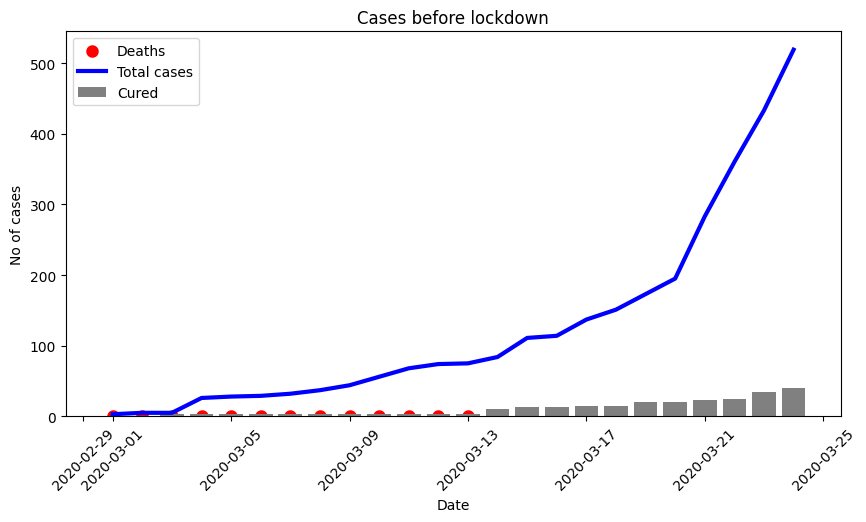

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df0["Date"],df0["Death"],label="Deaths",linewidth=3,color="red")
plt.bar(df0["Date"],df0["Cured/Discharged/Migrated"],label="Cured",linewidth=3,color="grey")
plt.plot(df0["Date"],df0["Total Confirmed cases"],label="Total cases",linewidth=3,color="blue")
plt.xlabel("Date")
plt.ylabel("No of cases")
plt.title("Cases before lockdown")
plt.legend()
plt.xticks(rotation=45)

(array([18321., 18322., 18326., 18330., 18334., 18338., 18342., 18346.]),
 [Text(18321.0, 0, '2020-02-29'),
  Text(18322.0, 0, '2020-03-01'),
  Text(18326.0, 0, '2020-03-05'),
  Text(18330.0, 0, '2020-03-09'),
  Text(18334.0, 0, '2020-03-13'),
  Text(18338.0, 0, '2020-03-17'),
  Text(18342.0, 0, '2020-03-21'),
  Text(18346.0, 0, '2020-03-25')])

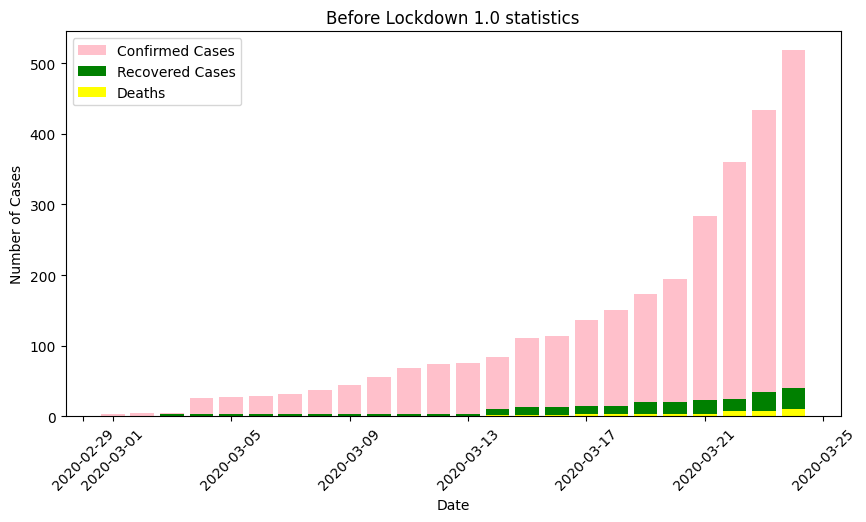

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df0["Date"],df0["Total Confirmed cases"],label="Confirmed Cases",linewidth=3,color="pink")
plt.bar(df0["Date"],df0["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3,color="green")
plt.bar(df0["Date"],df0["Death"],label="Deaths",linewidth=3,color="yellow")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Before Lockdown 1.0 statistics")
plt.legend()
plt.xticks(rotation=45)

(array([18346., 18350., 18353., 18357., 18361., 18365.]),
 [Text(18346.0, 0, '2020-03-25'),
  Text(18350.0, 0, '2020-03-29'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18357.0, 0, '2020-04-05'),
  Text(18361.0, 0, '2020-04-09'),
  Text(18365.0, 0, '2020-04-13')])

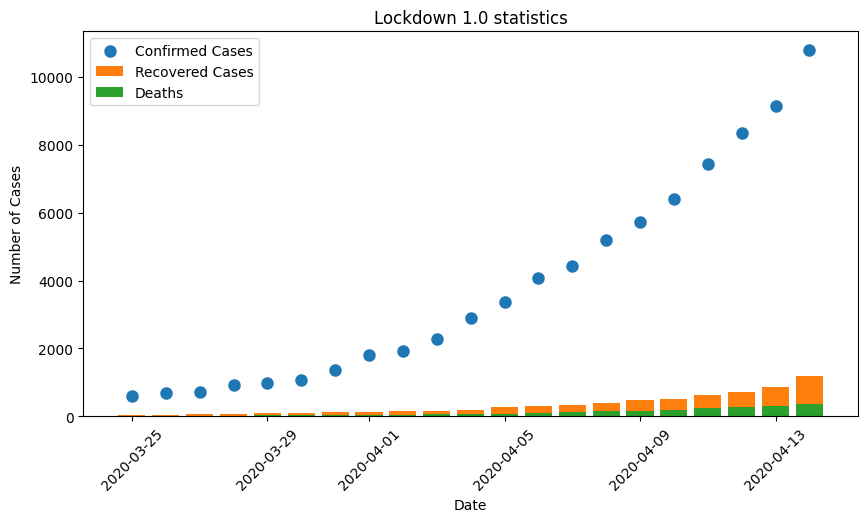

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df1["Date"],df1["Total Confirmed cases"],label="Confirmed Cases",linewidth=3)
plt.bar(df1["Date"],df1["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3)
plt.bar(df1["Date"],df1["Death"],label="Deaths",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Lockdown 1.0 statistics")
plt.legend()
plt.xticks(rotation=45)

In [20]:
# melt data
temp1 = df1[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp1.columns = ["Date","Active","Deaths","Cured"]
temp1 = temp1.melt(id_vars="Date", value_vars=["Deaths","Cured","Active"],var_name='Case', value_name='Count')
temp1.tail(5)

,Date,Case,Count
58,2020-04-10,Active,6412
59,2020-04-11,Active,7447
60,2020-04-12,Active,8356
61,2020-04-13,Active,9152
62,2020-04-14,Active,10804


In [21]:
# melt data
temp2 = df2[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp2.columns = ["Date","Active","Deaths","Cured"]
temp2 = temp2.melt(id_vars="Date", value_vars=["Deaths","Cured","Active"],var_name='Case', value_name='Count')
temp2.tail(5)

,Date,Case,Count
52,2020-04-29,Active,31332
53,2020-04-30,Active,33050
54,2020-05-01,Active,34752
55,2020-05-02,Active,37157
56,2020-05-03,Active,39856


(array([18367., 18369., 18371., 18373., 18375., 18377., 18379., 18381.,
        18383., 18385.]),
 [Text(18367.0, 0, '2020-04-15'),
  Text(18369.0, 0, '2020-04-17'),
  Text(18371.0, 0, '2020-04-19'),
  Text(18373.0, 0, '2020-04-21'),
  Text(18375.0, 0, '2020-04-23'),
  Text(18377.0, 0, '2020-04-25'),
  Text(18379.0, 0, '2020-04-27'),
  Text(18381.0, 0, '2020-04-29'),
  Text(18383.0, 0, '2020-05-01'),
  Text(18385.0, 0, '2020-05-03')])

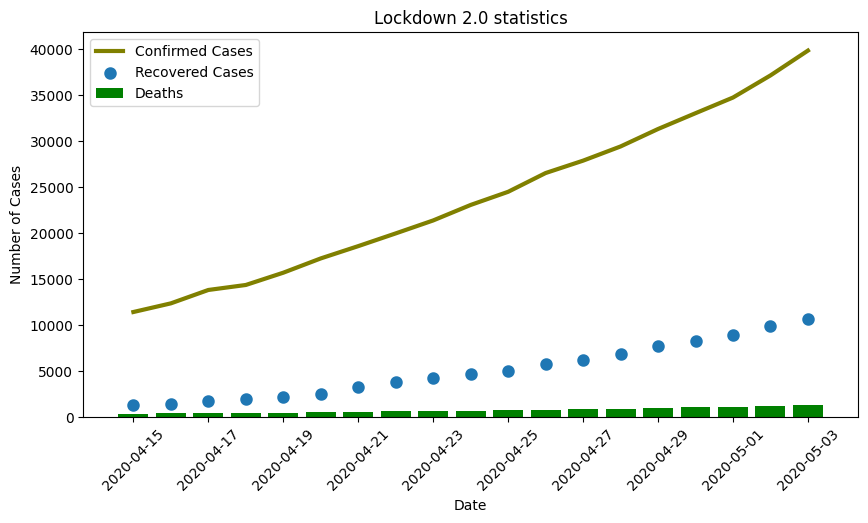

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df2["Date"],df2["Total Confirmed cases"],label="Confirmed Cases",linewidth=3,color="olive")
plt.scatter(df2["Date"],df2["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3)
plt.bar(df2["Date"],df2["Death"],label="Deaths",linewidth=3,color="green")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Lockdown 2.0 statistics")
plt.legend()
plt.xticks(rotation=45)

In [23]:
# melt data
temp3 = df3[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp3.columns = ["Date","Active","Deaths","Cured"]
temp3 = temp3.melt(id_vars="Date", value_vars=["Deaths","Cured","Active"],var_name='Case', value_name='Count')
temp3.tail(5)

,Date,Case,Count
37,2020-05-13,Active,74281
38,2020-05-14,Active,78003
39,2020-05-15,Active,81970
40,2020-05-16,Active,85710
41,2020-05-17,Active,90637


(array([18385., 18387., 18389., 18391., 18393., 18395., 18397., 18399.]),
 [Text(18385.0, 0, '2020-05-03'),
  Text(18387.0, 0, '2020-05-05'),
  Text(18389.0, 0, '2020-05-07'),
  Text(18391.0, 0, '2020-05-09'),
  Text(18393.0, 0, '2020-05-11'),
  Text(18395.0, 0, '2020-05-13'),
  Text(18397.0, 0, '2020-05-15'),
  Text(18399.0, 0, '2020-05-17')])

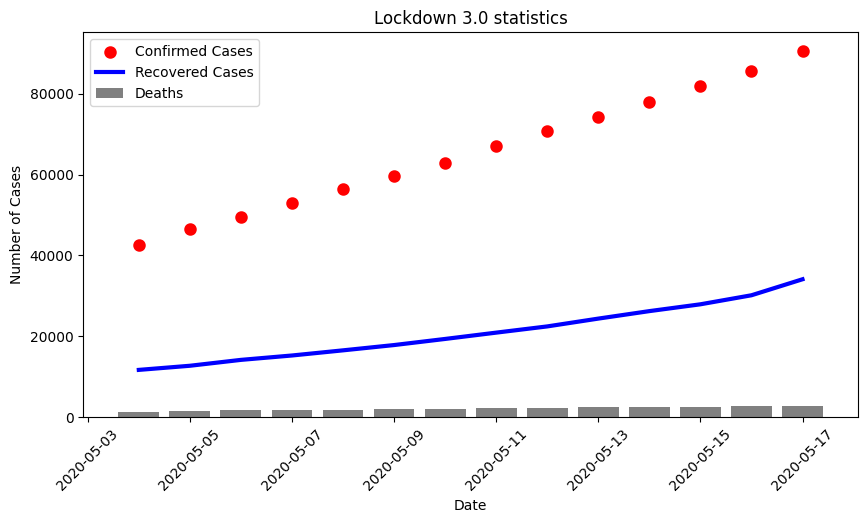

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df3["Date"],df3["Total Confirmed cases"],label="Confirmed Cases",linewidth=3,color="red")
plt.plot(df3["Date"],df3["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3,color="blue")
plt.bar(df3["Date"],df3["Death"],label="Deaths",linewidth=3,color="grey")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Lockdown 3.0 statistics")
plt.legend()
plt.xticks(rotation=45)

In [25]:

# melt data
temp4 = df4[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp4.columns = ["Date","Active","Deaths","Cured"]
temp4 = temp4.melt(id_vars="Date", value_vars=["Deaths","Cured","Active"],var_name='Case', value_name='Count')
temp4.tail(5)

,Date,Case,Count
37,2020-05-27,Active,147754
38,2020-05-28,Active,154001
39,2020-05-29,Active,161126
40,2020-05-30,Active,168720
41,2020-05-31,Active,176652


(array([18399., 18401., 18403., 18405., 18407., 18409., 18411., 18413.,
        18414.]),
 [Text(18399.0, 0, '2020-05-17'),
  Text(18401.0, 0, '2020-05-19'),
  Text(18403.0, 0, '2020-05-21'),
  Text(18405.0, 0, '2020-05-23'),
  Text(18407.0, 0, '2020-05-25'),
  Text(18409.0, 0, '2020-05-27'),
  Text(18411.0, 0, '2020-05-29'),
  Text(18413.0, 0, '2020-05-31'),
  Text(18414.0, 0, '2020-06-01')])

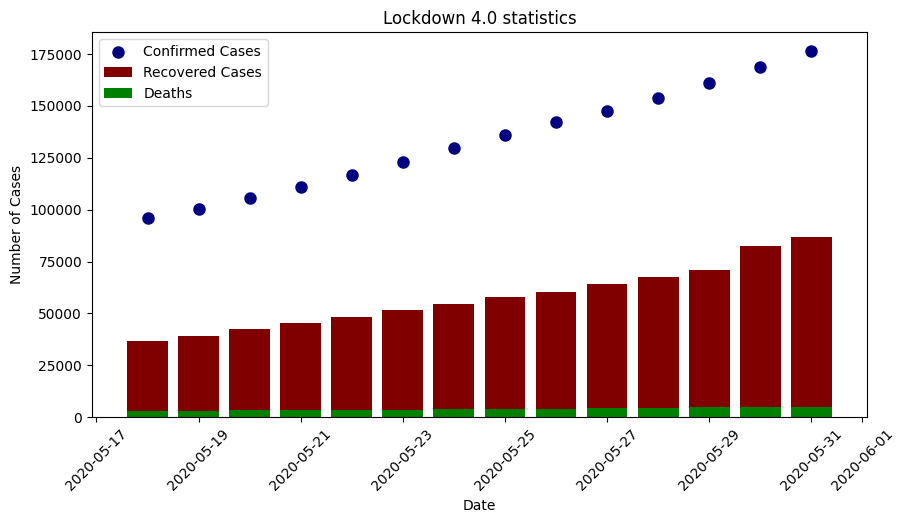

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df4["Date"],df4["Total Confirmed cases"],label="Confirmed Cases",linewidth=3,color="navy")
plt.bar(df4["Date"],df4["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3,color="maroon")
plt.bar(df4["Date"],df4["Death"],label="Deaths",linewidth=3,color="green")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Lockdown 4.0 statistics")
plt.legend()
plt.xticks(rotation=45)

In [27]:
# melt data
temp5 = df5[['Date', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
temp5.columns = ["Date","Active","Deaths","Cured"]
temp5 = temp5.melt(id_vars="Date", value_vars=["Deaths","Cured","Active"],var_name='Case', value_name='Count')
temp5.tail(5)

,Date,Case,Count
85,2020-06-26,Active,482128
86,2020-06-27,Active,500930
87,2020-06-28,Active,521020
88,2020-06-29,Active,541033
89,2020-06-30,Active,559836


(array([18414., 18418., 18422., 18426., 18430., 18434., 18438., 18442.,
        18444.]),
 [Text(18414.0, 0, '2020-06-01'),
  Text(18418.0, 0, '2020-06-05'),
  Text(18422.0, 0, '2020-06-09'),
  Text(18426.0, 0, '2020-06-13'),
  Text(18430.0, 0, '2020-06-17'),
  Text(18434.0, 0, '2020-06-21'),
  Text(18438.0, 0, '2020-06-25'),
  Text(18442.0, 0, '2020-06-29'),
  Text(18444.0, 0, '2020-07-01')])

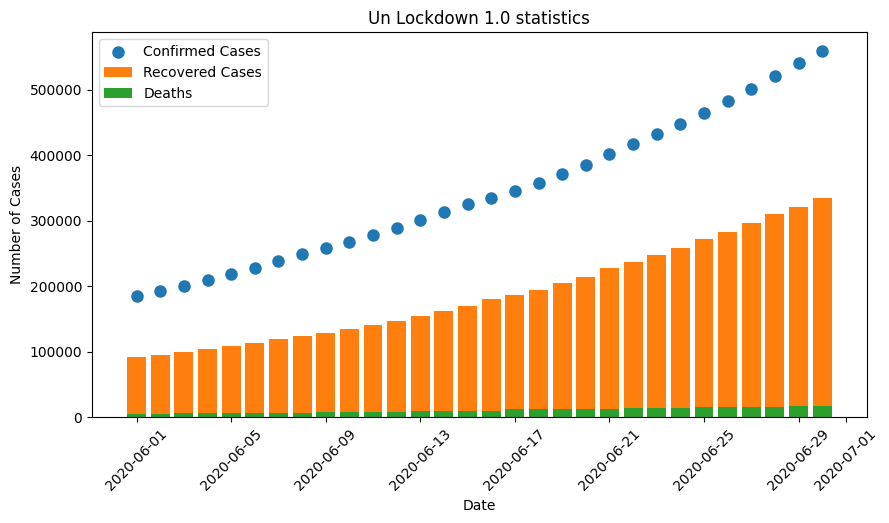

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(df5["Date"],df5["Total Confirmed cases"],label="Confirmed Cases",linewidth=3)
plt.bar(df5["Date"],df5["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3)
plt.bar(df5["Date"],df5["Death"],label="Deaths",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Un Lockdown 1.0 statistics")
plt.legend()
plt.xticks(rotation=45)

In [29]:
# Calculate daily confirmed cases
dc=[]
for i in df0.index:
    
    if i != min(df0.index):
        a=abs(df0.loc[i]["Total Confirmed cases"]-b)
        #print(2)
    else:
        a=df0.loc[i]["Total Confirmed cases"]
        #print(1)
    dc.append(a)
    b=df0.loc[i]["Total Confirmed cases"]
df0["Daily Confirmed"]=dc
df0.tail(10)

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated,Daily Confirmed
45,2020-03-15,45,111,2,13,27
46,2020-03-16,46,114,2,13,3
47,2020-03-17,47,137,3,14,23
48,2020-03-18,48,151,3,14,14
49,2020-03-19,49,173,4,20,22
50,2020-03-20,50,195,4,20,22
51,2020-03-21,51,283,4,23,88
52,2020-03-22,52,360,7,24,77
53,2020-03-23,53,433,8,35,73
54,2020-03-24,54,519,10,40,86


In [30]:
ss = []
for i in df0.index:
    if(i!= min(df0.index) and df0.loc[i-1]["Daily Confirmed"]!=0):
        lm = df0.loc[i]['Daily Confirmed']/df0.loc[i-1]['Daily Confirmed']
    else:
        lm = np.NaN
    ss.append(lm)
        
df0['Growth_Rate'] = ss
df0['Recovery Rate'] = df0['Cured/Discharged/Migrated']/df0['Total Confirmed cases']*100
df0["Fatility Rate"] = df0["Death"]/df0["Total Confirmed cases"]*100
df0.head(5)

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated,Daily Confirmed,Growth_Rate,Recovery Rate,Fatility Rate
31,2020-03-01,31,3,0,0,3,NaN,0.000000,0.0
32,2020-03-02,32,5,0,0,2,0.666667,0.000000,0.0
33,2020-03-03,33,5,0,3,0,0.000000,60.000000,0.0
34,2020-03-04,34,26,0,3,21,NaN,11.538462,0.0
35,2020-03-05,35,28,0,3,2,0.095238,10.714286,0.0


In [31]:
print("Mean Growth Rate",df0['Growth_Rate'].mean())
print("Mean Recovery Rate",df0['Recovery Rate'].mean())
print("Mean Fatility Rate",df0['Fatility Rate'].mean())

Mean Growth Rate 1.8485709068516747
Mean Recovery Rate 10.068064961208158
Mean Fatility Rate 1.0122504557651595


In [32]:
# Calculate daily confirmed cases
ind_data = india_data.copy()
dc=[]
for i in ind_data.index:
    if i != min(ind_data.index):
        a=ind_data.loc[i]["Total Confirmed cases"]-ind_data.loc[i-1]["Total Confirmed cases"]
    else:
        a=ind_data.loc[i]["Total Confirmed cases"]
    dc.append(a)
ind_data["Daily Confirmed"]=dc
ind_data.tail(10)

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated,Daily Confirmed
143,2020-06-21,143,401334,13254,227756,15551
144,2020-06-22,144,417450,13699,237196,16116
145,2020-06-23,145,432200,14011,248190,14750
146,2020-06-24,146,448042,14476,258685,15842
147,2020-06-25,147,464612,14894,271697,16570
148,2020-06-26,148,482128,15286,283076,17516
149,2020-06-27,149,500930,15685,295881,18802
150,2020-06-28,150,521020,16095,309713,20090
151,2020-06-29,151,541033,16475,321723,20013
152,2020-06-30,152,559836,16893,334822,18803


In [33]:
new_row={"Date":"2020-06-26"}
ind_data.append (new_row,ignore_index=True)
#ind_data.append

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated,Daily Confirmed
0,2020-01-30 00:00:00,0.0,1.0,0.0,0.0,1.0
1,2020-01-31 00:00:00,1.0,1.0,0.0,0.0,0.0
2,2020-02-01 00:00:00,2.0,2.0,0.0,0.0,1.0
3,2020-02-02 00:00:00,3.0,3.0,0.0,0.0,1.0
4,2020-02-03 00:00:00,4.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...
149,2020-06-27 00:00:00,149.0,500930.0,15685.0,295881.0,18802.0
150,2020-06-28 00:00:00,150.0,521020.0,16095.0,309713.0,20090.0
151,2020-06-29 00:00:00,151.0,541033.0,16475.0,321723.0,20013.0
152,2020-06-30 00:00:00,152.0,559836.0,16893.0,334822.0,18803.0


In [34]:
ss = []
for i in ind_data.index:
    if(i!= min(ind_data.index) and ind_data.loc[i-1]["Daily Confirmed"]!=0):
        lm = ind_data.loc[i]['Daily Confirmed']/ind_data.loc[i-1]['Daily Confirmed']
    else:
        lm = np.NaN
    ss.append(lm)
        
ind_data['Growth Rate'] = ss
ind_data['Recovery Rate'] = ind_data['Cured/Discharged/Migrated']/ind_data['Total Confirmed cases']*100
ind_data["Fatility Rate"] = ind_data["Death"]/ind_data["Total Confirmed cases"]*100
ind_data.tail(10)

,Date,Days Since,Total Confirmed cases,Death,Cured/Discharged/Migrated,Daily Confirmed,Growth Rate,Recovery Rate,Fatility Rate
143,2020-06-21,143,401334,13254,227756,15551,1.096840,56.749740,3.302486
144,2020-06-22,144,417450,13699,237196,16116,1.036332,56.820218,3.281591
145,2020-06-23,145,432200,14011,248190,14750,0.915240,57.424803,3.241786
146,2020-06-24,146,448042,14476,258685,15842,1.074034,57.736775,3.230947
147,2020-06-25,147,464612,14894,271697,16570,1.045954,58.478257,3.205686
148,2020-06-26,148,482128,15286,283076,17516,1.057091,58.713869,3.170527
149,2020-06-27,149,500930,15685,295881,18802,1.073419,59.066337,3.131176
150,2020-06-28,150,521020,16095,309713,20090,1.068503,59.443591,3.089133
151,2020-06-29,151,541033,16475,321723,20013,0.996167,59.464580,3.045101
152,2020-06-30,152,559836,16893,334822,18803,0.939539,59.807158,3.017491


Text(0.5, 1.0, 'COVID-19 Situation in India')

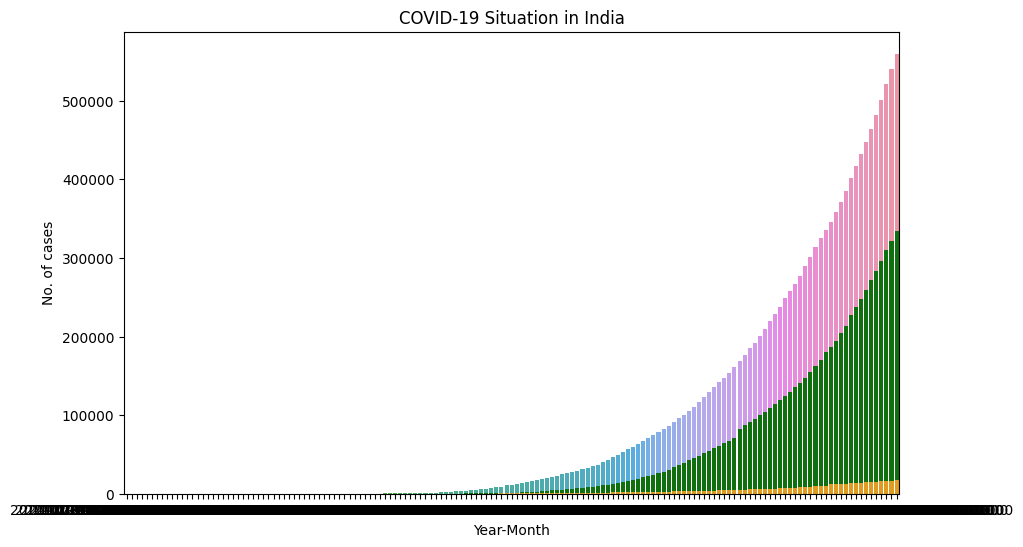

In [35]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=ind_data["Date"],y=ind_data["Total Confirmed cases"],label="Total Confirmed Cases",linewidth=3)
sns.barplot(x=ind_data["Date"],y=ind_data["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3,color="green")
sns.barplot(x=ind_data["Date"],y=ind_data["Death"],label="Death",linewidth=3,color="orange")
plt.xlabel("Year-Month")
plt.ylabel("No. of cases")
plt.title("COVID-19 Situation in India")

In [36]:
df10 = ind_data[(ind_data["Date"]>="2020-03-01") & (ind_data["Date"]<="2020-03-24")]
df11 = ind_data[(ind_data["Date"]>="2020-03-25") & (ind_data["Date"]<="2020-04-14")]
df12 = ind_data[(ind_data["Date"]>="2020-04-15") & (ind_data["Date"]<="2020-05-03")]
df13 = ind_data[(ind_data["Date"]>="2020-05-04") & (ind_data["Date"]<="2020-05-17")]
df14 = ind_data[(ind_data["Date"]>="2020-05-18") & (ind_data["Date"]<="2020-05-31")]
df15 = ind_data[(ind_data["Date"]>="2020-06-01")]

In [37]:
print("Stastics before Lockdown 1.0")
print("No. of days: 24")
print("Mean Daily Growth Rate",df10['Growth Rate'].mean())
print("Mean Recovery Rate",df10['Recovery Rate'].mean())
print("Mean Fatility Rate",df10['Fatility Rate'].mean())
t0=df10["Total Confirmed cases"].max()-df10["Total Confirmed cases"].min()
totcases0=t0/24
totrecovery0=(df10["Cured/Discharged/Migrated"].max()-df10["Cured/Discharged/Migrated"].min())/t0*100
totdeath0=(df10["Death"].max()-df10["Death"].min())/t0*100
print("Total no. of cases before Lockdown 1.0:", t0)
print("Mean Growth Rate:",totcases0)
print('Recovery Rate:' , totrecovery0)
print("Fatility Rate", totdeath0)

Stastics before Lockdown 1.0
No. of days: 24
Mean Daily Growth Rate 1.904852061146199
Mean Recovery Rate 10.068064961208158
Mean Fatility Rate 1.0122504557651595
Total no. of cases before Lockdown 1.0: 516
Mean Growth Rate: 21.5
Recovery Rate: 7.751937984496124
Fatility Rate 1.937984496124031


In [38]:
print("Stastics for Lockdown 1.0")
print("No. of days: 21")
print("Mean Daily Growth Rate",df11['Growth Rate'].mean())
print("Mean Daily Recovery Rate",df11['Recovery Rate'].mean())
print("Mean Daily Fatility Rate",df11['Fatility Rate'].mean())

t1=df11["Total Confirmed cases"].max()-df11["Total Confirmed cases"].min()
totcases1=t1/21
totrecovery1=(df11["Cured/Discharged/Migrated"].max()-df11["Cured/Discharged/Migrated"].min())/t1*100
totdeath1=(df11["Death"].max()-df11["Death"].min())/t1*100
print("Total no. of cases during Lockdown 1.0:", t1)
print("Mean Growth Rate:", totcases1)
print('Recovery Rate:' , totrecovery1)
print("Fatility Rate", totdeath1)

Stastics for Lockdown 1.0
No. of days: 21
Mean Daily Growth Rate 1.5185039742794393
Mean Daily Recovery Rate 8.155559737470819
Mean Daily Fatility Rate 2.6232893752540343
Total no. of cases during Lockdown 1.0: 10198
Mean Growth Rate: 485.6190476190476
Recovery Rate: 11.23749754853893
Fatility Rate 3.3634045891351243


In [39]:
print("Stastics for Lockdown 2.0")
print("No. of days: 19")
print("Mean Daily Growth Rate",df12['Growth Rate'].mean())
print("Mean Daily Recovery Rate",df12['Recovery Rate'].mean())
print("Mean Daily Fatility Rate",df12['Fatility Rate'].mean())

t2=df12["Total Confirmed cases"].max()-df12["Total Confirmed cases"].min()
totcases2=t2/19
totrecovery2=(df12["Cured/Discharged/Migrated"].max()-df12["Cured/Discharged/Migrated"].min())/t2*100
totdeath2=(df12["Death"].max()-df12["Death"].min())/t2*100

print("Total no. of cases during Lockdown 2.0:", t2)
print("Mean Growth Rate:", totcases2)
print('Recovery Rate:' , totrecovery2)
print("Fatility Rate", totdeath2)

Stastics for Lockdown 2.0
No. of days: 19
Mean Daily Growth Rate 1.118913606403362
Mean Daily Recovery Rate 19.646535118565378
Mean Daily Fatility Rate 3.21927274376149
Total no. of cases during Lockdown 2.0: 28417
Mean Growth Rate: 1495.6315789473683
Recovery Rate: 32.82190238237674
Fatility Rate 3.2515747615863746


In [40]:
print("Stastics for Lockdown 3.0")
print("No. of days: 14")
print("Mean Daily Growth Rate",df13['Growth Rate'].mean())
print("Mean Daily Recovery Rate",df13['Recovery Rate'].mean())
print("Mean Daily Fatility Rate",df13['Fatility Rate'].mean())
t3=df13["Total Confirmed cases"].max()-df13["Total Confirmed cases"].min()
totcases3=t3/14
totrecovery3=(df13["Cured/Discharged/Migrated"].max()-df13["Cured/Discharged/Migrated"].min())/t3*100
totdeath3=(df13["Death"].max()-df13["Death"].min())/t3*100

print("Total no. of cases during Lockdown 3.0:", t3)
print("Mean Growth Rate:", totcases3)
print('Recovery Rate:' , totrecovery3)
print("Fatility Rate", totdeath3)

Stastics for Lockdown 3.0
No. of days: 14
Mean Daily Growth Rate 1.059315814425462
Mean Daily Recovery Rate 31.33781738639073
Mean Daily Fatility Rate 3.2911846960622606
Total no. of cases during Lockdown 3.0: 48104
Mean Growth Rate: 3436.0
Recovery Rate: 46.569931814402125
Fatility Rate 3.116164975885581


In [41]:
print("Stastics for Lockdown 4.0")
print("No. of days: 14")
print("Mean Daily Growth Rate",df14['Growth Rate'].mean())
print("Mean Daily Recovery Rate",df14['Recovery Rate'].mean())
print("Mean Daily Fatility Rate",df14['Fatility Rate'].mean())
t4=df14["Total Confirmed cases"].max()-df14["Total Confirmed cases"].min()
totcases4=t4/14
totrecovery4=(df14["Cured/Discharged/Migrated"].max()-df14["Cured/Discharged/Migrated"].min())/t4*100
totdeath4=(df14["Death"].max()-df14["Death"].min())/t4*100
print("Total no. of cases during Lockdown 4.0:", t4)
print("Mean Growth Rate:", totcases4)
print('Recovery Rate:' , totrecovery4)
print("Fatility Rate", totdeath4)

Stastics for Lockdown 4.0
No. of days: 14
Mean Daily Growth Rate 1.0388828892484379
Mean Daily Recovery Rate 42.75530523067981
Mean Daily Fatility Rate 3.0111240272787767
Total no. of cases during Lockdown 4.0: 80893
Mean Growth Rate: 5778.071428571428
Recovery Rate: 62.00783751375274
Fatility Rate 2.63928893723808


In [42]:
print("Stastics after Lockdown 4.0 during UnLockdown 1.0")
print("No. of days: 30")
print("Mean Daily Growth Rate",df15['Growth Rate'].mean())
print("Mean Daily Recovery Rate",df15['Recovery Rate'].mean())
print("Mean Daily Fataility Rate",df15['Fatility Rate'].mean())
t5=df15["Total Confirmed cases"].max()-df15["Total Confirmed cases"].min()
totcases5=t5/30
totrecovery5=(df15["Cured/Discharged/Migrated"].max()-df15["Cured/Discharged/Migrated"].min())/t5*100
totdeath5=(df15["Death"].max()-df15["Death"].min())/t5*100
print("Total no. of cases during UnLockdown 1.0:", t5)
print("Mean Growth Rate:", totcases5)
print('Recovery Rate:' , totrecovery5)
print("Fataility Rate", totdeath5)

Stastics after Lockdown 4.0 during UnLockdown 1.0
No. of days: 30
Mean Daily Growth Rate 1.0326603485782722
Mean Daily Recovery Rate 53.76345873596207
Mean Daily Fataility Rate 3.0654259631366245
Total no. of cases during UnLockdown 1.0: 374931
Mean Growth Rate: 12497.7
Recovery Rate: 64.81272554149965
Fataility Rate 3.066964321435144


In [43]:
total_cases=[]
total_cases.append(t0)
total_cases.append(t1)
total_cases.append(t2)
total_cases.append(t3)
total_cases.append(t4)
total_cases.append(t5)
mean_growth_rate=[]
mean_growth_rate.append(totcases0)
mean_growth_rate.append(totcases1)
mean_growth_rate.append(totcases2)
mean_growth_rate.append(totcases3)
mean_growth_rate.append(totcases4)
mean_growth_rate.append(totcases5)
recovery_rate=[]
recovery_rate.append(totrecovery0)
recovery_rate.append(totrecovery1)
recovery_rate.append(totrecovery2)
recovery_rate.append(totrecovery3)
recovery_rate.append(totrecovery4)
recovery_rate.append(totrecovery5)
fatility_rate=[]
fatility_rate.append(totdeath0)
fatility_rate.append(totdeath1)
fatility_rate.append(totdeath2)
fatility_rate.append(totdeath3)
fatility_rate.append(totdeath4)
fatility_rate.append(totdeath5)

In [44]:
days=[24,21,19,14,14,30]
desc=["Before Lockdown","Lockdown 1.0","Lockdown 2.0","Lockdown 3.0","Lockdown 4.0","UnLockdown 1.0"]

In [45]:
final_values= pd.DataFrame(columns=["Description","Days","Total Cases","Daily Growth Rate","Recovery Rate","Fatility Rate"])

In [46]:
final_values["Description"]=desc
final_values["Days"]=np.array(days)
final_values["Total Cases"]=np.array(total_cases)
final_values["Daily Growth Rate"]=mean_growth_rate
final_values["Recovery Rate"]=recovery_rate
final_values["Fatility Rate"]=fatility_rate
final_values

,Description,Days,Total Cases,Daily Growth Rate,Recovery Rate,Fatility Rate
0,Before Lockdown,24,516,21.500000,7.751938,1.937984
1,Lockdown 1.0,21,10198,485.619048,11.237498,3.363405
2,Lockdown 2.0,19,28417,1495.631579,32.821902,3.251575
3,Lockdown 3.0,14,48104,3436.000000,46.569932,3.116165
4,Lockdown 4.0,14,80893,5778.071429,62.007838,2.639289
5,UnLockdown 1.0,30,374931,12497.700000,64.812726,3.066964


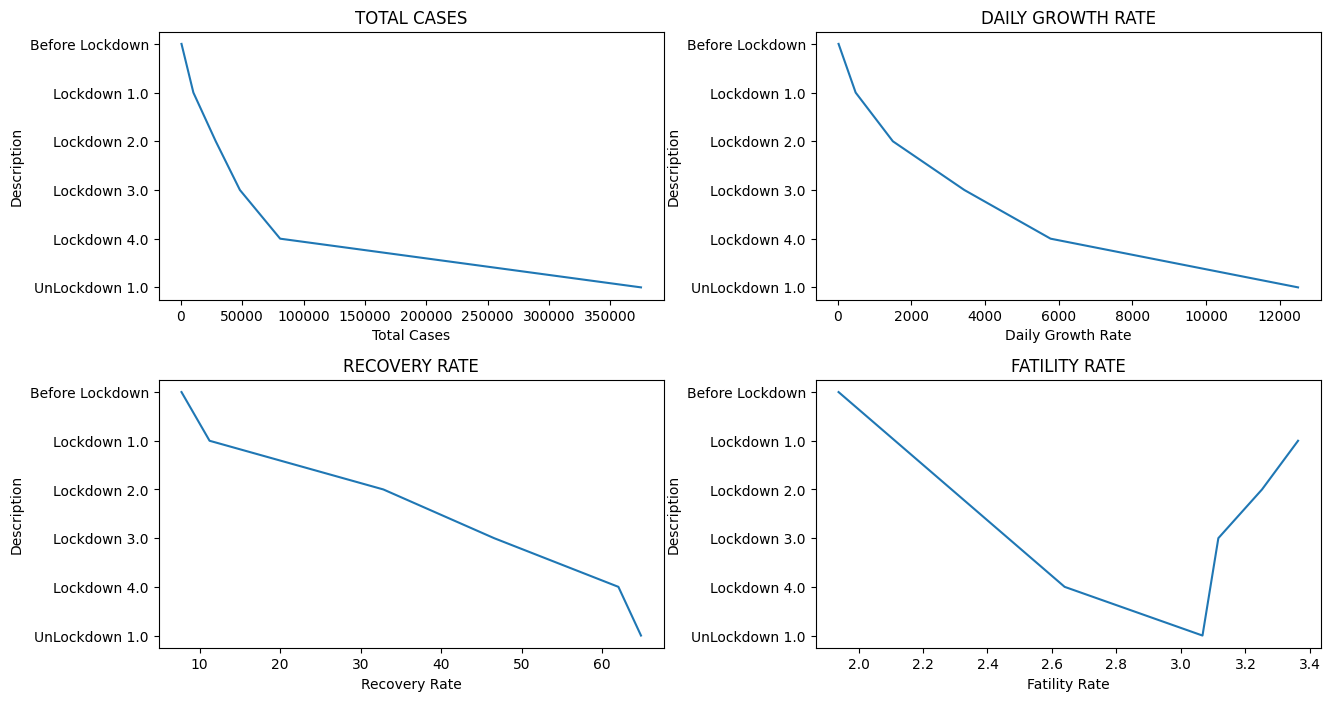

In [47]:
axes = ["axes1","axes2", "axes3","axes4"]
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
x = final_values.columns
x = x[2:]

fig.subplots_adjust(hspace=0.3,wspace=0.3)
for ax, feature, name in zip(axes.flatten(), range(0,4),x):
    sns.lineplot(x=final_values[name],y=final_values["Description"],ax=ax)
    ax.set(title=name.upper(), xlabel=name)

In [48]:
train_ml=india_data.iloc[:int(india_data.shape[0]*0.85)]
valid_ml=india_data.iloc[int(india_data.shape[0]*0.85):]
model_scores=[]
train_ml.shape, valid_ml.shape

((130, 5), (23, 5))

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

x_train = np.array(train_ml["Days Since"]).reshape(-1,1)
y_train = train_ml["Total Confirmed cases"]
x_test = np.array(valid_ml["Days Since"]).reshape(-1,1)
y_test = valid_ml["Total Confirmed cases"]

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_pred = lin_reg.predict(x_train)
mse_train_lr = mean_squared_error (y_train,y_train_pred)
rmse_train_lr = np.sqrt (mse_train_lr)
r2_score_train_lr = r2_score (y_train,y_train_pred)
print ("Train data results:")
print ("Mean Squared Error:", mse_train_lr)
print ("Root Mean Squared Error:", rmse_train_lr)
print ("r2 Score:", r2_score_train_lr)

y_pred = lin_reg.predict(x_test)
mse_lr = mean_squared_error (y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred)
print ("Test data results:")
print ("Mean Squared Error:", mse_lr)
print ("Root Mean Squared Error:", rmse_lr)
print ("r2 Score:", r2_score_lr)

Train data results:
Mean Squared Error: 1331752211.8318214
Root Mean Squared Error: 36493.18034690621
r2 Score: 0.6311912081376292
Test data results:
Mean Squared Error: 69902159010.82639
Root Mean Squared Error: 264390.1643609807
r2 Score: -7.03754256035346


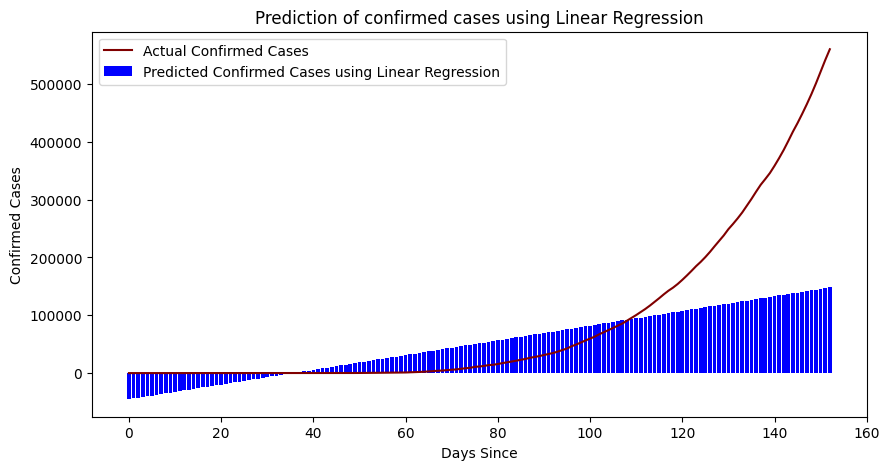

In [51]:
plt.figure(figsize=(10,5))
prediction_ridge=lin_reg.predict(np.array(india_data["Days Since"]).reshape(-1,1))
plt.plot(india_data["Total Confirmed cases"],label="Actual Confirmed Cases",color="maroon")
plt.bar(india_data["Days Since"],prediction_ridge, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='blue')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')
plt.title("Prediction of confirmed cases using Linear Regression")
#plt.xticks(rotation=90)
plt.legend()

In [52]:
from datetime import timedelta
new_date=[]
new_confirmed_lr=[]
for i in range(1,11):
    ndate=np.array(india_data["Days Since"].max()+i).reshape(-1,1)
    new_date.append(india_data["Date"].max()+timedelta(days=i))
    new_confirmed_lr.append(lin_reg.predict(ndate)[0])
new_date, new_confirmed_lr

([Timestamp('2020-07-01 00:00:00'),
  Timestamp('2020-07-02 00:00:00'),
  Timestamp('2020-07-03 00:00:00'),
  Timestamp('2020-07-04 00:00:00'),
  Timestamp('2020-07-05 00:00:00'),
  Timestamp('2020-07-06 00:00:00'),
  Timestamp('2020-07-07 00:00:00'),
  Timestamp('2020-07-08 00:00:00'),
  Timestamp('2020-07-09 00:00:00'),
  Timestamp('2020-07-10 00:00:00')],
 [149485.60481776347,
  150757.79392044139,
  152029.98302311928,
  153302.17212579717,
  154574.36122847509,
  155846.55033115298,
  157118.73943383087,
  158390.92853650879,
  159663.11763918668,
  160935.30674186457])

In [53]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_confirmed_lr),
                               columns=["Dates","Linear Regression"])
model_predictions.head(10)

,Dates,Linear Regression
0,2020-07-01,149486
1,2020-07-02,150758
2,2020-07-03,152030
3,2020-07-04,153302
4,2020-07-05,154574
5,2020-07-06,155847
6,2020-07-07,157119
7,2020-07-08,158391
8,2020-07-09,159663
9,2020-07-10,160935


In [55]:
x_train = np.array(train_ml["Days Since"]).reshape(-1,1)
y_train = train_ml["Death"]
x_test = np.array(valid_ml["Days Since"]).reshape(-1,1)
y_test = valid_ml["Death"]

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_pred = lin_reg.predict(x_train)
mse_train_lr = mean_squared_error (y_train,y_train_pred)
rmse_train_lr = np.sqrt (mse_train_lr)
r2_score_train_lr = r2_score (y_train,y_train_pred)
print ("Train data results:")
print ("Mean Squared Error:", mse_train_lr)
print ("Root Mean Squared Error:", rmse_train_lr)
print ("r2 Score:", r2_score_train_lr)

y_pred = lin_reg.predict(x_test)
mse_lr = mean_squared_error (y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred)
print ("Test data results:")
print ("Mean Squared Error:", mse_lr)
print ("Root Mean Squared Error:", rmse_lr)
print ("r2 Score:", r2_score_lr)

Train data results:
Mean Squared Error: 1092095.4974148748
Root Mean Squared Error: 1045.0337302761452
r2 Score: 0.6541480780169437
Test data results:
Mean Squared Error: 72158228.14083011
Root Mean Squared Error: 8494.59994001072
r2 Score: -6.32167141216644


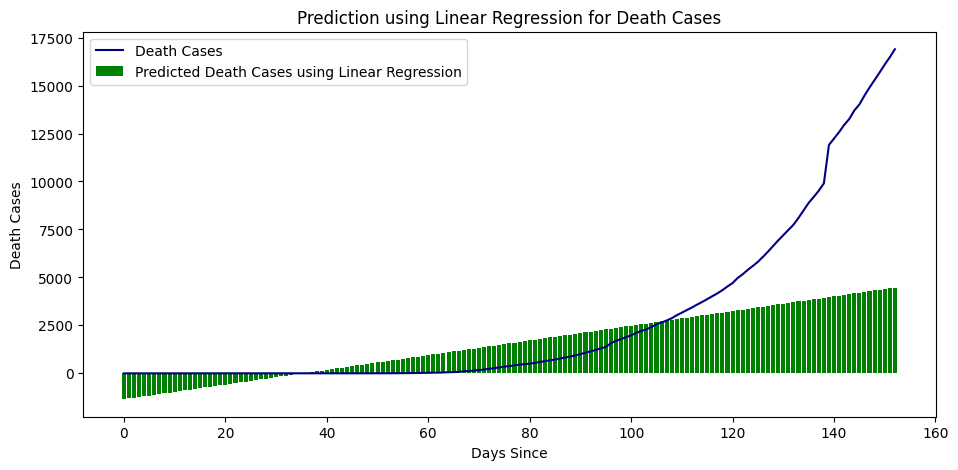

In [56]:
plt.figure(figsize=(11,5))
prediction_ridge=lin_reg.predict(np.array(india_data["Days Since"]).reshape(-1,1))
plt.plot(india_data["Death"],label="Death Cases",color="navy")
plt.bar(india_data["Days Since"],prediction_ridge, linestyle='--',label="Predicted Death Cases using Linear Regression",color='green')
plt.xlabel('Days Since')
plt.ylabel('Death Cases')
plt.title("Prediction using Linear Regression for Death Cases")
#plt.xticks(rotation=90)
plt.legend()

In [57]:
new_death_lr=[]
for i in range(1,11):
    ndate=np.array(india_data["Days Since"].max()+i).reshape(-1,1)
    new_death_lr.append(lin_reg.predict(ndate)[0])
new_date, new_death_lr

([Timestamp('2020-07-01 00:00:00'),
  Timestamp('2020-07-02 00:00:00'),
  Timestamp('2020-07-03 00:00:00'),
  Timestamp('2020-07-04 00:00:00'),
  Timestamp('2020-07-05 00:00:00'),
  Timestamp('2020-07-06 00:00:00'),
  Timestamp('2020-07-07 00:00:00'),
  Timestamp('2020-07-08 00:00:00'),
  Timestamp('2020-07-09 00:00:00'),
  Timestamp('2020-07-10 00:00:00')],
 [4511.598981277909,
  4549.897622526594,
  4588.19626377528,
  4626.494905023966,
  4664.793546272651,
  4703.092187521337,
  4741.390828770022,
  4779.689470018708,
  4817.988111267394,
  4856.286752516079])

In [58]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_death_lr),
                               columns=["Dates","Linear Regression"])
model_predictions.head(10)

,Dates,Linear Regression
0,2020-07-01,4512
1,2020-07-02,4550
2,2020-07-03,4588
3,2020-07-04,4626
4,2020-07-05,4665
5,2020-07-06,4703
6,2020-07-07,4741
7,2020-07-08,4780
8,2020-07-09,4818
9,2020-07-10,4856


In [60]:
x_train = np.array(train_ml["Days Since"]).reshape(-1,1)
y_train = train_ml["Cured/Discharged/Migrated"]
x_test = np.array(valid_ml["Days Since"]).reshape(-1,1)
y_test = valid_ml["Cured/Discharged/Migrated"]

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_pred = lin_reg.predict(x_train)
mse_train_lr = mean_squared_error (y_train,y_train_pred)
rmse_train_lr = np.sqrt (mse_train_lr)
r2_score_train_lr = r2_score (y_train,y_train_pred)
print ("Train data results:")
print ("Mean Squared Error:", mse_train_lr)
print ("Root Mean Squared Error:", rmse_train_lr)
print ("r2 Score:", r2_score_train_lr)

y_pred = lin_reg.predict(x_test)
mse_lr = mean_squared_error (y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred)
print ("Test data results:")
print ("Mean Squared Error:", mse_lr)
print ("Root Mean Squared Error:", rmse_lr)
print ("r2 Score:", r2_score_lr)

Train data results:
Mean Squared Error: 386999499.9479944
Root Mean Squared Error: 19672.302863365905
r2 Score: 0.5252976055389037
Test data results:
Mean Squared Error: 28459703526.070477
Root Mean Squared Error: 168700.04008911934
r2 Score: -5.832406697329433


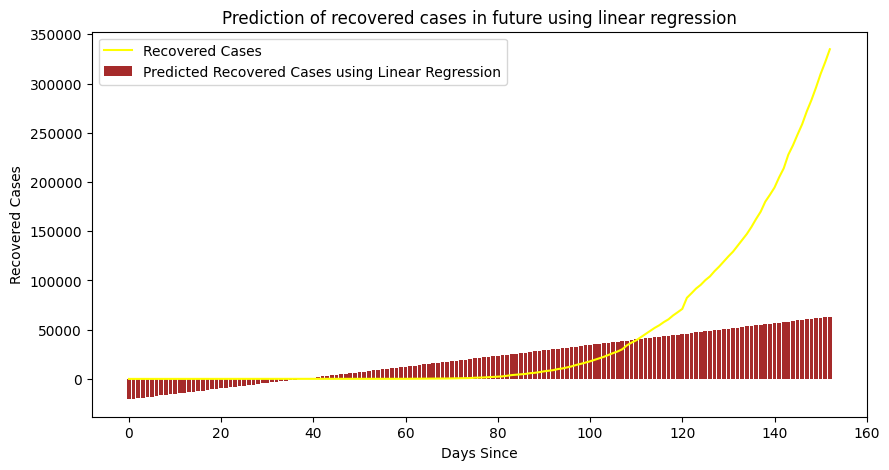

In [61]:
plt.figure(figsize=(10,5))
prediction_ridge=lin_reg.predict(np.array(india_data["Days Since"]).reshape(-1,1))
plt.plot(india_data["Cured/Discharged/Migrated"],label="Recovered Cases",color="yellow")
plt.bar(india_data["Days Since"],prediction_ridge, linestyle='--',label="Predicted Recovered Cases using Linear Regression",color='brown')
plt.xlabel('Days Since')
plt.ylabel('Recovered Cases')
plt.title("Prediction of recovered cases in future using linear regression")
#plt.xticks(rotation=90)
plt.legend()

In [62]:
new_recovered_lr=[]
for i in range(1,11):
    ndate=np.array(india_data["Days Since"].max()+i).reshape(-1,1)
    new_recovered_lr.append(lin_reg.predict(ndate)[0])
new_date, new_recovered_lr

([Timestamp('2020-07-01 00:00:00'),
  Timestamp('2020-07-02 00:00:00'),
  Timestamp('2020-07-03 00:00:00'),
  Timestamp('2020-07-04 00:00:00'),
  Timestamp('2020-07-05 00:00:00'),
  Timestamp('2020-07-06 00:00:00'),
  Timestamp('2020-07-07 00:00:00'),
  Timestamp('2020-07-08 00:00:00'),
  Timestamp('2020-07-09 00:00:00'),
  Timestamp('2020-07-10 00:00:00')],
 [63738.34225238637,
  64289.79375110955,
  64841.24524983273,
  65392.696748555914,
  65944.1482472791,
  66495.59974600228,
  67047.05124472547,
  67598.50274344865,
  68149.95424217184,
  68701.40574089502])

In [63]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_recovered_lr),
                               columns=["Dates","Linear Regression"])
model_predictions.head(10)

,Dates,Linear Regression
0,2020-07-01,63738
1,2020-07-02,64290
2,2020-07-03,64841
3,2020-07-04,65393
4,2020-07-05,65944
5,2020-07-06,66496
6,2020-07-07,67047
7,2020-07-08,67599
8,2020-07-09,68150
9,2020-07-10,68701


In [65]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

poly = PolynomialFeatures(degree = 6) 
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))

y=train_ml["Total Confirmed cases"]
linreg=LinearRegression()
linreg.fit(train_poly,y)

train_pred_poly=linreg.predict(train_poly)
train_mse_poly=mean_squared_error(train_ml["Total Confirmed cases"],train_pred_poly)
train_rmse_poly=np.sqrt(train_mse_poly)
train_r2_poly=r2_score(train_ml["Total Confirmed cases"],train_pred_poly)
print("Metrics for Train data")
print("Mean Squared Error for Polynomial Regression: ",train_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",train_rmse_poly)    
print("R2 value for Polynomial Regression: ",train_r2_poly)

prediction_poly=linreg.predict(valid_poly)
pred_mse_poly=mean_squared_error(valid_ml["Total Confirmed cases"],prediction_poly)
pred_rmse_poly=np.sqrt(pred_mse_poly)
pred_r2_poly=r2_score(valid_ml["Total Confirmed cases"],prediction_poly)
print("Metrics for Test data")
print("Mean Squared Error for Polynomial Regression: ",pred_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",pred_rmse_poly)    

print("R2 value for Polynomial Regression: ",pred_r2_poly)

Metrics for Train data
Mean Squared Error for Polynomial Regression:  239693.4931030815
Root Mean Squared Error for Polynomial Regression:  489.58502132222293
R2 value for Polynomial Regression:  0.9999336204837332
Metrics for Test data
Mean Squared Error for Polynomial Regression:  16755533.281344222
Root Mean Squared Error for Polynomial Regression:  4093.3523280245768
R2 value for Polynomial Regression:  0.9980734026848961


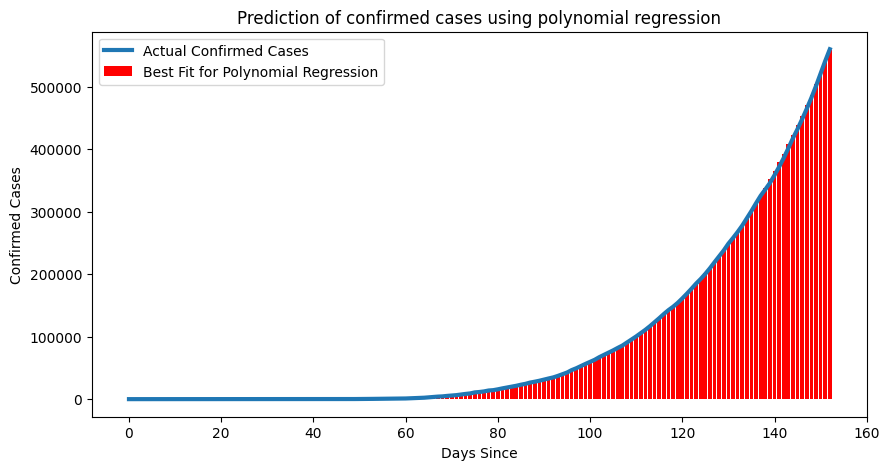

In [66]:
# The plot is drawn for the complete dataset (train data + test data)
complete_data=poly.fit_transform(np.array(india_data["Days Since"]).reshape(-1,1))
complete_pred_poly=linreg.predict(complete_data)
plt.figure(figsize=(10,5))
plt.plot(india_data["Total Confirmed cases"],label="Actual Confirmed Cases",linewidth=3)
plt.bar(india_data["Days Since"],complete_pred_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='red')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')
plt.title("Prediction of confirmed cases using polynomial regression")
#plt.xticks(rotation=90)
plt.legend()

In [67]:
from datetime import timedelta
new_confirmed_poly=[]
for i in range(1,11):
    new_date_poly=poly.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    new_confirmed_poly.append(linreg.predict(new_date_poly)[0])
prediction_poly

array([247585.89677289, 257780.34486974, 268296.58585123, 279142.06958082,
       290324.37058945, 301851.18975475, 313730.35599832, 325969.82800115,
       338577.69593729, 351562.18322563, 364931.64829987, 378694.58639664,
       392859.63136181, 407435.55747493, 422431.28129191, 437855.86350575,
       453718.51082557, 470028.57787369, 486795.56910098, 504029.14072027,
       521739.10265805, 539935.42052421, 558628.21760005])

In [68]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
confirmed_cases_predictions=pd.DataFrame(zip(new_date,new_confirmed_lr,new_confirmed_poly),
                               columns=["Dates","Linear Regression", "Polynomial Regression"])
confirmed_cases_predictions.head(10)

,Dates,Linear Regression,Polynomial Regression
0,2020-07-01,149486,577828
1,2020-07-02,150758,597545
2,2020-07-03,152030,617789
3,2020-07-04,153302,638572
4,2020-07-05,154574,659905
5,2020-07-06,155847,681798
6,2020-07-07,157119,704264
7,2020-07-08,158391,727312
8,2020-07-09,159663,750956
9,2020-07-10,160935,775206


In [69]:
y=train_ml["Death"]
linreg=LinearRegression()
linreg.fit(train_poly,y)

dtrain_pred_poly=linreg.predict(train_poly)
dtrain_mse_poly=mean_squared_error(train_ml["Death"],dtrain_pred_poly)
dtrain_rmse_poly=np.sqrt(dtrain_mse_poly)
dtrain_r2_poly=r2_score(train_ml["Death"],dtrain_pred_poly)
print("Metrics for Train data")
print("Mean Squared Error for Polynomial Regression: ",dtrain_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",dtrain_rmse_poly)    
print("R2 value for Polynomial Regression: ",dtrain_r2_poly)

dprediction_poly=linreg.predict(valid_poly)
dpred_mse_poly=mean_squared_error(valid_ml["Death"],dprediction_poly)
dpred_rmse_poly=np.sqrt(dpred_mse_poly)
dpred_r2_poly=r2_score(valid_ml["Death"],dprediction_poly)
print("Metrics for Test data")
print("Mean Squared Error for Polynomial Regression: ",dpred_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",dpred_rmse_poly)    
print("R2 value for Polynomial Regression: ",dpred_r2_poly)

Metrics for Train data
Mean Squared Error for Polynomial Regression:  1251.6365175767733
Root Mean Squared Error for Polynomial Regression:  35.378475342738746
R2 value for Polynomial Regression:  0.9996036235876324
Metrics for Test data
Mean Squared Error for Polynomial Regression:  1421387.3481633295
Root Mean Squared Error for Polynomial Regression:  1192.219505025534
R2 value for Polynomial Regression:  0.8557762381255889


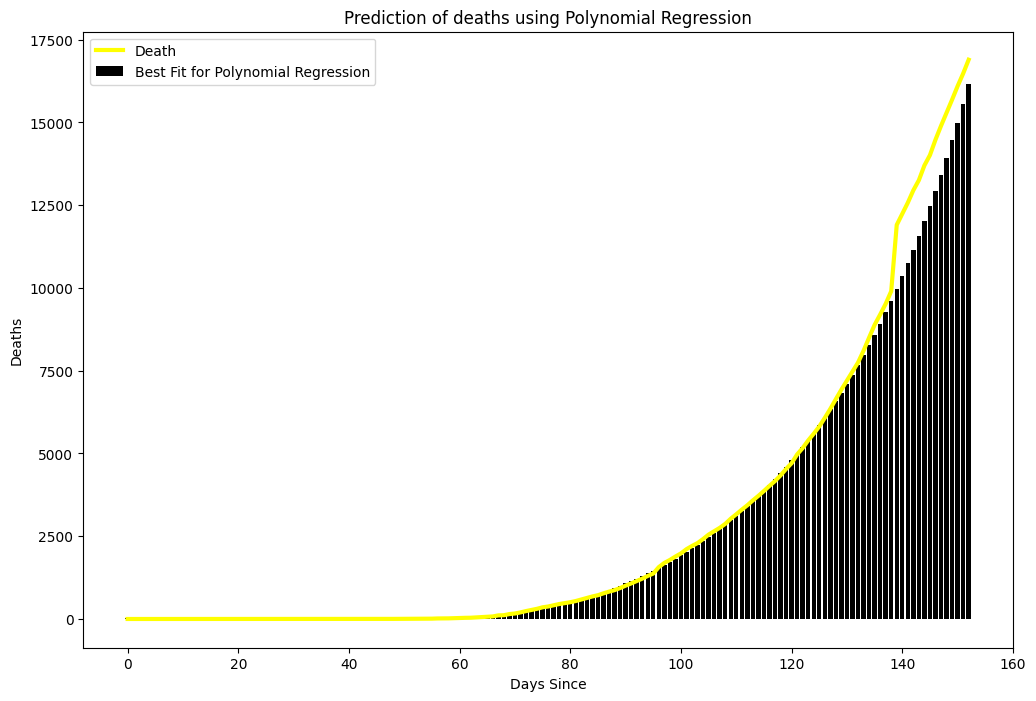

In [70]:
# The plot is drawn for the complete dataset (train data + test data)
complete_data=poly.fit_transform(np.array(india_data["Days Since"]).reshape(-1,1))
complete_pred_poly=linreg.predict(complete_data)
plt.figure(figsize=(12,8))
plt.plot(india_data["Death"],label="Death",linewidth=3, color="yellow")
plt.bar(india_data["Days Since"],complete_pred_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Days Since')
plt.ylabel('Deaths')
plt.title("Prediction of deaths using Polynomial Regression")
#plt.xticks(rotation=90)
plt.legend()

In [71]:
from datetime import timedelta
new_death_poly=[]
for i in range(1,11):
    new_date_poly=poly.fit_transform(np.array(india_data["Days Since"].max()+i).reshape(-1,1))
    new_death_poly.append(linreg.predict(new_date_poly)[0])
new_death_poly

[16751.44682531566,
 17380.907300629864,
 18034.04866838328,
 18711.791397434696,
 19415.087343735104,
 20144.920484048875,
 20902.307657965786,
 21688.29931820083,
 22503.98028918502,
 23350.470533944936]

In [72]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
death_cases_predictions=pd.DataFrame(zip(new_date,new_death_lr,new_death_poly),
                               columns=["Dates","Linear Regression", "Polynomial Regression"])
death_cases_predictions.head(10)

,Dates,Linear Regression,Polynomial Regression
0,2020-07-01,4512,16751
1,2020-07-02,4550,17381
2,2020-07-03,4588,18034
3,2020-07-04,4626,18712
4,2020-07-05,4665,19415
5,2020-07-06,4703,20145
6,2020-07-07,4741,20902
7,2020-07-08,4780,21688
8,2020-07-09,4818,22504
9,2020-07-10,4856,23350


In [74]:
y=train_ml["Cured/Discharged/Migrated"]
linreg=LinearRegression()
linreg.fit(train_poly,y)

ctrain_pred_poly=linreg.predict(train_poly)
ctrain_mse_poly=mean_squared_error(train_ml["Cured/Discharged/Migrated"],ctrain_pred_poly)
ctrain_rmse_poly=np.sqrt(ctrain_mse_poly)
ctrain_r2_poly=r2_score(train_ml["Cured/Discharged/Migrated"],ctrain_pred_poly)
print("Metrics for Train data")
print("Mean Squared Error for Polynomial Regression: ",ctrain_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",ctrain_rmse_poly)    
print("R2 value for Polynomial Regression: ",ctrain_r2_poly)

cprediction_poly=linreg.predict(valid_poly)
cpred_mse_poly=mean_squared_error(valid_ml["Cured/Discharged/Migrated"],cprediction_poly)
cpred_rmse_poly=np.sqrt(cpred_mse_poly)
cpred_r2_poly=r2_score(valid_ml["Cured/Discharged/Migrated"],cprediction_poly)
print("Metrics for Test data")
print("Mean Squared Error for Polynomial Regression: ",cpred_mse_poly)    
print("Root Mean Squared Error for Polynomial Regression: ",cpred_rmse_poly)    
print("R2 value for Polynomial Regression: ",cpred_r2_poly)

Metrics for Train data
Mean Squared Error for Polynomial Regression:  676785.3877420642
Root Mean Squared Error for Polynomial Regression:  822.6696710965248
R2 value for Polynomial Regression:  0.9991698396402563
Metrics for Test data
Mean Squared Error for Polynomial Regression:  47703990.3503838
Root Mean Squared Error for Polynomial Regression:  6906.807536799024
R2 value for Polynomial Regression:  0.9885475594339649


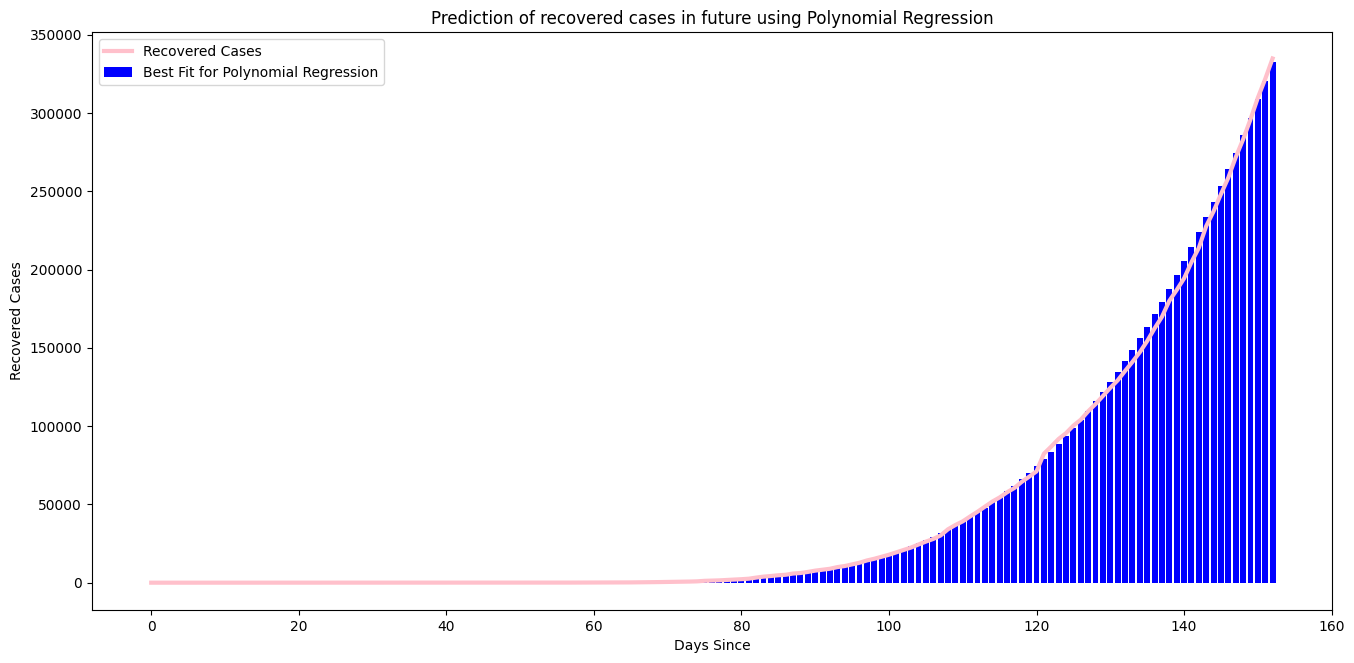

In [75]:
# The plot is drawn for the complete dataset (train data + test data)
complete_data=poly.fit_transform(np.array(india_data["Days Since"]).reshape(-1,1))
complete_pred_poly=linreg.predict(complete_data)
plt.figure(figsize=(16,7.5))
plt.plot(india_data["Cured/Discharged/Migrated"],label="Recovered Cases",linewidth=3, color="pink")
plt.bar(india_data["Days Since"],complete_pred_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='blue')
plt.xlabel('Days Since')
plt.ylabel('Recovered Cases')
plt.title("Prediction of recovered cases in future using Polynomial Regression")
#plt.xticks(rotation=90)
plt.legend()